# Projeto Final de Ciência dos Dados - FIFA 18
<h2><li>Luigi Portugal</li> 
<li>Jadson Silva</li>
</h2>

<h1> Abrindo Banco de Dados</h1>

In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import sklearn.model_selection as split 
import seaborn as sns

#Para plotar o boxplot
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.plotly as py



#Imports da aula 27
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D



In [44]:
dados = pd.read_csv('CompleteDataset.csv')

# Selecionando colunas de interesse
atributos = ['Preferred Positions','Acceleration',
'Aggression',
'Agility',
'Balance',
'Ball control',
'Composure',
'Crossing',
'Curve',
'Dribbling',
'Finishing',
'Free kick accuracy',
'GK diving',
'GK handling',
'GK kicking',
'GK positioning',
'GK reflexes',
'Heading accuracy',
'Interceptions',
'Long passing',
'Long shots',
'Marking',
'Penalties',
'Positioning',
'Reactions',
'Short passing',
'Shot power',
'Sliding tackle',
'Sprint speed',
'Stamina',
'Standing tackle',
'Strength',
'Vision',
'Volleys']
dados = dados[atributos]
dadoscluster = dados.drop(columns='Preferred Positions')
dados


,Preferred Positions,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,ST LW,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,RW,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,LW,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,ST,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,GK,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,ST,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,GK,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,LW,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,CDM CM,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,ST,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


In [45]:

#Simplificando todas as posições e suas derivadas em 4 

meio = ['CAM','CB','CDM','CF','CM','LM','RCM','RM']
Atk = ['LAM','LS','LW','RAM','RF','LF','RS','RW','ST']
Def = ['RWB','LWB','RDM','LWB','LDM','LCB','LB','RCB','RB']
GK = ['GK']


coluna_nova = []

for pos in dados["Preferred Positions"]:
    positions = pos.split(" ")
    
    if positions[0] in meio:
        positions[0] = 'Mid'
    
    elif positions[0] in Atk:
        positions[0] = 'Atk'
        
    elif positions[0] in Def:
        positions[0] = 'Def'
    
    else:
        positions[0] = 'GK'
    
    coluna_nova.append(positions[0])
    
dados["Preferred Positions"] = coluna_nova

In [46]:
dados_3 = dados.copy()
dados

,Preferred Positions,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Atk,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,Atk,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,Atk,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,Atk,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,GK,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,Atk,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,GK,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,Atk,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,Mid,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,Atk,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


In [47]:
dados_3['Preferred Positions'] = dados_3['Preferred Positions'].replace(to_replace=['Atk','Mid'],value='Atk/Mid')

In [95]:
dados_2 = dados_3.copy()
dados_3

,Preferred Positions,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Atk/Mid,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,Atk/Mid,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,Atk/Mid,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,Atk/Mid,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,GK,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,Atk/Mid,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,GK,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,Atk/Mid,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,Atk/Mid,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,Atk/Mid,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


In [64]:

dados_2['Preferred Positions'] = dados_2['Preferred Positions'].replace(to_replace=['Def','GK'],value='Def')
dados_2

,Preferred Positions,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Atk/Mid,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,Atk/Mid,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,Atk/Mid,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,Atk/Mid,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,Def,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,Atk/Mid,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,Def,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,Atk/Mid,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,Atk/Mid,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,Atk/Mid,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


<h1> Análise Exploratória</h1>

### Analisando dados de jogadores de Atk

In [132]:
dadosAtk= dados[dados['Preferred Positions']=='Atk']

In [133]:
dadosAtk.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.00000,...,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000
mean,71.083945,51.791254,68.650176,66.299713,65.249920,60.957229,50.903607,53.614108,64.806575,65.28535,...,61.831471,59.489307,66.111714,25.465369,71.636132,64.612831,27.858921,65.774976,56.574529,57.774338
std,11.537060,15.592794,11.565166,12.225003,8.669306,9.959501,13.996954,13.036182,9.182254,8.45703,...,9.612429,9.627329,9.460257,11.093177,10.874343,10.667226,11.830293,13.559626,10.157223,11.226443
min,26.000000,18.000000,29.000000,28.000000,31.000000,30.000000,11.000000,17.000000,23.000000,20.00000,...,31.000000,25.000000,21.000000,10.000000,30.000000,28.000000,10.000000,21.000000,22.000000,19.000000
25%,65.000000,38.000000,61.000000,59.000000,60.000000,53.000000,39.000000,43.000000,59.000000,60.00000,...,55.000000,53.000000,60.000000,18.000000,66.000000,58.000000,19.000000,57.000000,49.000000,50.000000
50%,72.000000,52.000000,70.000000,67.000000,65.000000,61.000000,52.000000,53.000000,65.000000,65.00000,...,62.000000,60.000000,67.000000,23.000000,73.000000,65.000000,25.000000,67.000000,56.000000,58.000000
75%,79.000000,64.000000,77.000000,75.000000,71.000000,68.000000,62.000000,63.000000,71.000000,71.00000,...,68.000000,66.000000,73.000000,31.000000,78.000000,72.000000,35.000000,76.000000,64.000000,66.000000
max,96.000000,94.000000,96.000000,96.000000,95.000000,96.000000,101.000000,90.000000,97.000000,95.00000,...,96.000000,89.000000,94.000000,75.000000,96.000000,95.000000,74.000000,98.000000,92.000000,90.000000


### Analisando dados de jogadores de Mid

In [102]:
dadosMid= dados[dados['Preferred Positions']=='Mid']

In [130]:
dadosMid.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,...,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000
mean,66.213407,60.662832,65.428302,66.300476,62.859480,61.078243,53.679294,51.316045,59.285799,47.551369,...,62.428501,63.714300,59.646569,53.000893,66.250298,67.319714,55.367711,65.786989,56.196946,46.012098
std,12.243475,14.372938,13.231448,12.682333,10.803208,10.119651,14.503468,15.867083,13.897181,15.846652,...,8.974080,10.086239,12.919729,16.920988,11.827919,11.533957,17.236759,12.981232,13.923406,14.628178
min,20.000000,13.000000,23.000000,21.000000,16.000000,25.000000,11.000000,11.000000,13.000000,10.000000,...,30.000000,24.000000,12.000000,10.000000,21.000000,27.000000,10.000000,21.000000,11.000000,11.000000
25%,59.000000,51.000000,58.000000,59.000000,57.000000,55.000000,43.000000,39.000000,52.000000,35.000000,...,56.000000,58.000000,51.000000,42.000000,60.000000,60.000000,43.000000,58.000000,47.000000,34.000000
50%,67.000000,62.000000,67.000000,67.000000,64.000000,62.000000,56.000000,52.000000,62.000000,49.000000,...,63.000000,65.000000,61.000000,58.000000,67.000000,68.000000,61.000000,67.000000,58.000000,46.000000
75%,75.000000,71.000000,75.000000,75.000000,70.000000,68.000000,65.000000,64.000000,69.000000,60.000000,...,69.000000,70.000000,69.000000,66.000000,74.000000,75.000000,68.000000,75.000000,67.000000,57.000000
max,96.000000,106.000000,95.000000,96.000000,94.000000,100.000000,91.000000,92.000000,92.000000,88.000000,...,89.000000,92.000000,98.000000,95.000000,110.000000,116.000000,99.000000,96.000000,94.000000,91.000000


### Analisando dados de jogadores de Def

In [104]:
dadosDef= dados[dados['Preferred Positions']=='Def']

In [105]:
dadosDef.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,...,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,70.338940,64.266545,66.398903,67.052285,60.717002,58.548080,60.433638,49.519196,58.847532,38.531993,...,62.036197,60.366362,53.625229,64.607313,70.816453,70.978793,65.382815,66.089580,49.850457,38.730165
std,9.394211,10.883783,10.149176,10.125213,9.554505,10.042693,11.482497,14.662014,10.630205,12.316286,...,8.096786,9.946656,15.375225,8.321983,9.647326,9.898512,7.819100,10.324314,11.502359,12.353677
min,30.000000,26.000000,24.000000,31.000000,25.000000,28.000000,20.000000,16.000000,17.000000,11.000000,...,33.000000,21.000000,14.000000,17.000000,29.000000,30.000000,22.000000,28.000000,19.000000,11.000000
25%,65.000000,57.000000,60.000000,61.000000,56.000000,52.000000,54.000000,37.000000,53.000000,29.000000,...,56.000000,56.000000,42.000000,60.000000,66.000000,65.000000,61.000000,60.000000,40.000000,29.000000
50%,71.000000,65.000000,67.000000,68.000000,62.000000,60.000000,62.000000,50.000000,60.000000,37.000000,...,62.000000,62.000000,55.000000,65.000000,72.000000,72.000000,66.000000,67.000000,51.000000,36.000000
75%,76.000000,72.000000,73.000000,74.000000,67.000000,66.000000,68.000000,61.000000,66.000000,48.000000,...,68.000000,67.000000,66.000000,70.000000,77.000000,78.000000,70.000000,73.000000,59.000000,48.000000
max,96.000000,96.000000,92.000000,93.000000,88.000000,88.000000,90.000000,86.000000,85.000000,75.000000,...,87.000000,85.000000,93.000000,87.000000,96.000000,93.000000,88.000000,94.000000,86.000000,80.000000


### Analisando dados de jogadores de GK

In [126]:
dadosGK= dados[dados['Preferred Positions']=='GK']

In [127]:
dadosGK.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.00000,2029.000000,2029.000000
mean,38.898472,26.719566,40.688024,43.291769,20.052242,36.537703,14.407097,14.848694,14.049778,12.431247,...,59.286348,26.922129,22.548546,14.132578,39.302612,30.697881,14.238541,61.05865,36.124692,13.030064
std,10.943487,7.859950,11.549215,10.846956,5.829111,12.769624,3.993939,4.541641,4.261079,4.061027,...,10.359767,7.399881,7.039774,3.403454,10.881108,7.620556,3.463571,11.25533,12.925241,4.548726
min,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.00000,10.000000,4.000000
25%,31.000000,21.000000,33.000000,36.000000,16.000000,27.000000,12.000000,12.000000,11.000000,10.000000,...,52.000000,22.000000,19.000000,12.000000,32.000000,25.000000,12.000000,54.00000,27.000000,10.000000
50%,40.000000,25.000000,38.000000,43.000000,20.000000,33.000000,14.000000,14.000000,14.000000,12.000000,...,60.000000,26.000000,22.000000,13.000000,41.000000,31.000000,14.000000,62.00000,35.000000,13.000000
75%,47.000000,32.000000,48.000000,51.000000,23.000000,45.000000,16.000000,17.000000,16.000000,15.000000,...,67.000000,31.000000,24.000000,16.000000,47.000000,36.000000,16.000000,69.00000,45.000000,16.000000
max,65.000000,68.000000,74.000000,70.000000,54.000000,71.000000,45.000000,65.000000,33.000000,34.000000,...,88.000000,66.000000,70.000000,35.000000,70.000000,61.000000,34.000000,85.00000,72.000000,40.000000


In [72]:
#Colunas do Database
dados.columns

Index(['Preferred Positions', 'Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Long passing', 'Long shots',
       'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina',
       'Standing tackle', 'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [73]:
dados.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,64.607308,55.834992,63.345587,63.818364,58.119682,57.903120,49.791502,47.328124,55.076581,45.306435,...,61.910239,58.317224,55.670986,45.582559,64.842445,63.272176,47.456871,65.297369,53.032423,43.232190
std,14.916971,17.480816,14.794278,14.098144,16.800909,12.934109,18.470220,18.476582,18.993822,19.481567,...,9.179489,14.928462,17.407831,21.491756,14.654377,15.942077,21.841923,12.622276,14.396201,17.739679
min,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,96.000000,106.000000,96.000000,96.000000,95.000000,100.000000,101.000000,92.000000,97.000000,95.000000,...,96.000000,92.000000,98.000000,95.000000,110.000000,116.000000,99.000000,98.000000,94.000000,91.000000


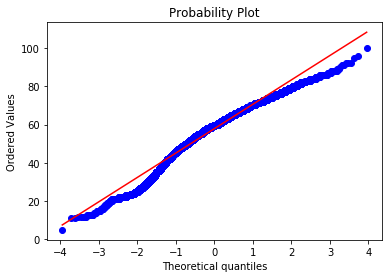

In [74]:
stats.probplot(dadoscluster['Composure'],dist='norm',plot=plt);

## Correlação dos Dados

In [75]:
corr = dados.corr()
corr


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Acceleration,1.000000,0.252033,0.798550,0.701015,0.670093,0.437792,0.657726,0.599608,0.742430,0.596914,...,0.191657,0.561220,0.536118,0.155373,0.915196,0.606822,0.154797,-0.161799,0.456072,0.567727
Aggression,0.252033,1.000000,0.234893,0.183006,0.539372,0.581617,0.466963,0.392808,0.424077,0.232687,...,0.394777,0.596222,0.494666,0.708982,0.284250,0.643334,0.732425,0.462864,0.296157,0.318644
Agility,0.798550,0.234893,1.000000,0.765561,0.700742,0.493918,0.689573,0.674679,0.758859,0.633944,...,0.278639,0.610389,0.565779,0.105848,0.752902,0.561058,0.111580,-0.243477,0.591123,0.622087
Balance,0.701015,0.183006,0.765561,1.000000,0.597047,0.373899,0.614481,0.578598,0.661079,0.512766,...,0.138723,0.535344,0.452222,0.151053,0.635493,0.469730,0.145048,-0.403441,0.487259,0.510694
Ball control,0.670093,0.539372,0.700742,0.597047,1.000000,0.763392,0.839398,0.832184,0.932577,0.784636,...,0.429038,0.905170,0.828401,0.366032,0.663104,0.721720,0.395357,0.075582,0.721259,0.792740
Composure,0.437792,0.581617,0.493918,0.373899,0.763392,1.000000,0.646874,0.668485,0.680153,0.588030,...,0.593547,0.756834,0.698453,0.384607,0.444765,0.605484,0.418337,0.266547,0.634599,0.644465
Crossing,0.657726,0.466963,0.689573,0.614481,0.839398,0.646874,1.000000,0.830703,0.852423,0.649413,...,0.381384,0.810203,0.704426,0.403434,0.641523,0.663915,0.415542,-0.039763,0.683400,0.687588
Curve,0.599608,0.392808,0.674679,0.578598,0.832184,0.668485,0.830703,1.000000,0.841343,0.753759,...,0.407848,0.777959,0.784841,0.225533,0.577726,0.590452,0.250967,-0.038865,0.743314,0.800248
Dribbling,0.742430,0.424077,0.758859,0.661079,0.932577,0.680153,0.852423,0.841343,1.000000,0.820804,...,0.351379,0.836356,0.796936,0.252786,0.724502,0.676008,0.275300,-0.051444,0.729025,0.808962
Finishing,0.596914,0.232687,0.633944,0.512766,0.784636,0.588030,0.649413,0.753759,0.820804,1.000000,...,0.319689,0.658597,0.799367,-0.085554,0.586387,0.500672,-0.049531,-0.019250,0.689137,0.879575


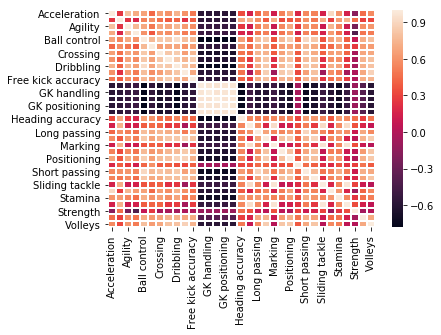

In [76]:
sns.heatmap(corr,linewidths=1)

In [94]:

#data_1 = dados['Acceleration']
#data_2 = dados['Agility']
#data_3 = dados['Stamina']
#data_4 = dados['Dribbling']

#data = [data_1,data_2,data_3,data_4]
#mpl_fig = plt.figure()
#ax = mpl_fig.add_subplot(111)


### Plotando Scatter Matrix com o intuito de visualizar o nível de relação entre os atributos

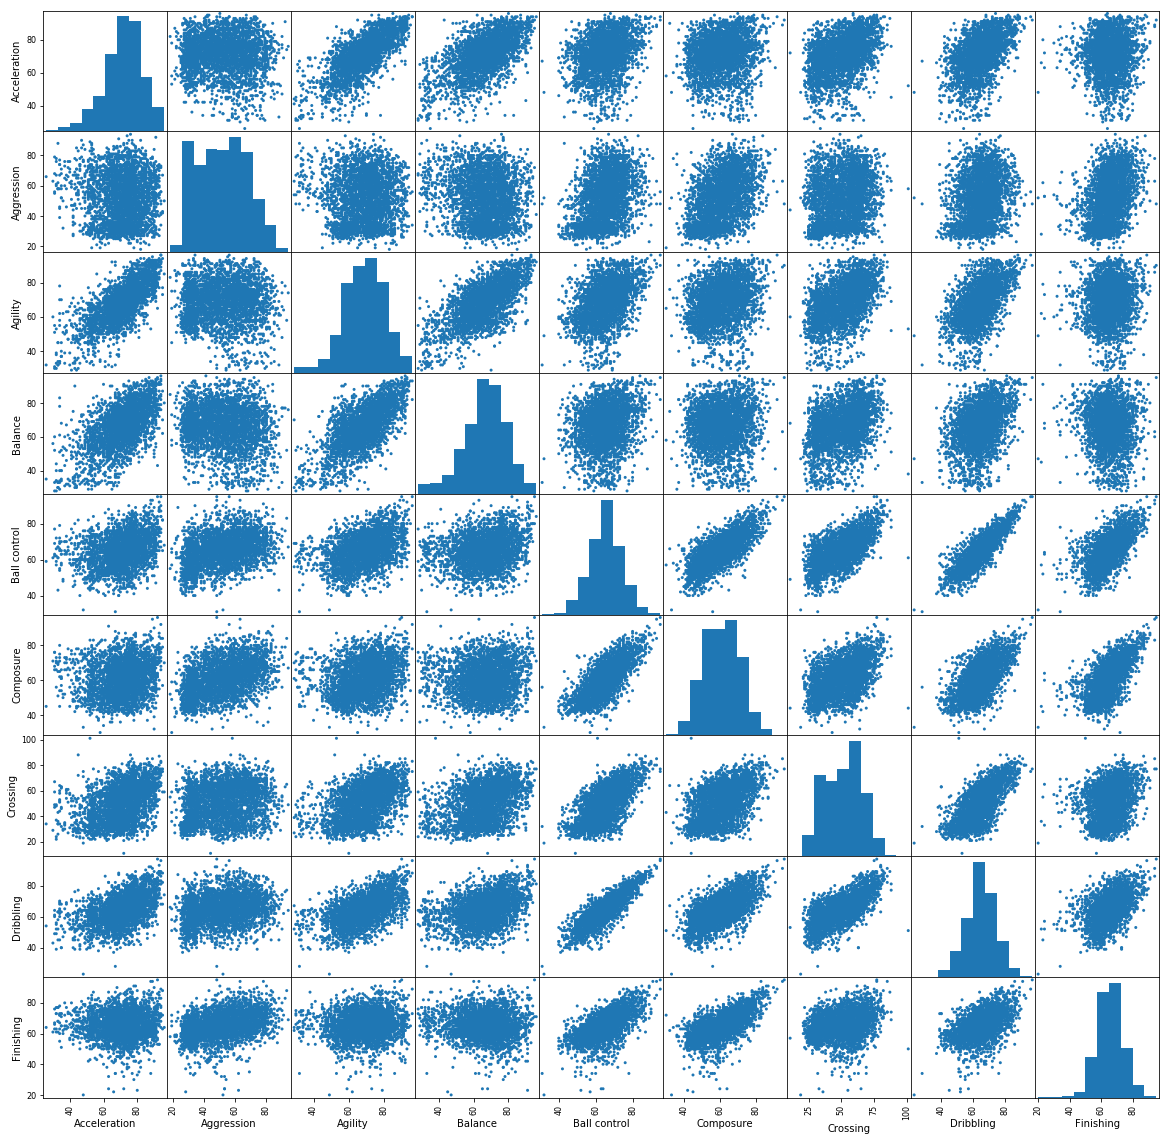

In [134]:
dadosAtk2 = dadosAtk.drop(columns = 'Preferred Positions')
pd.plotting.scatter_matrix(dadosAtk2[['Acceleration',
'Aggression',
'Agility',
'Balance',
'Ball control',
'Composure',
'Crossing',
'Dribbling',
'Finishing',]].head(5000),alpha=1,figsize=(20,20));

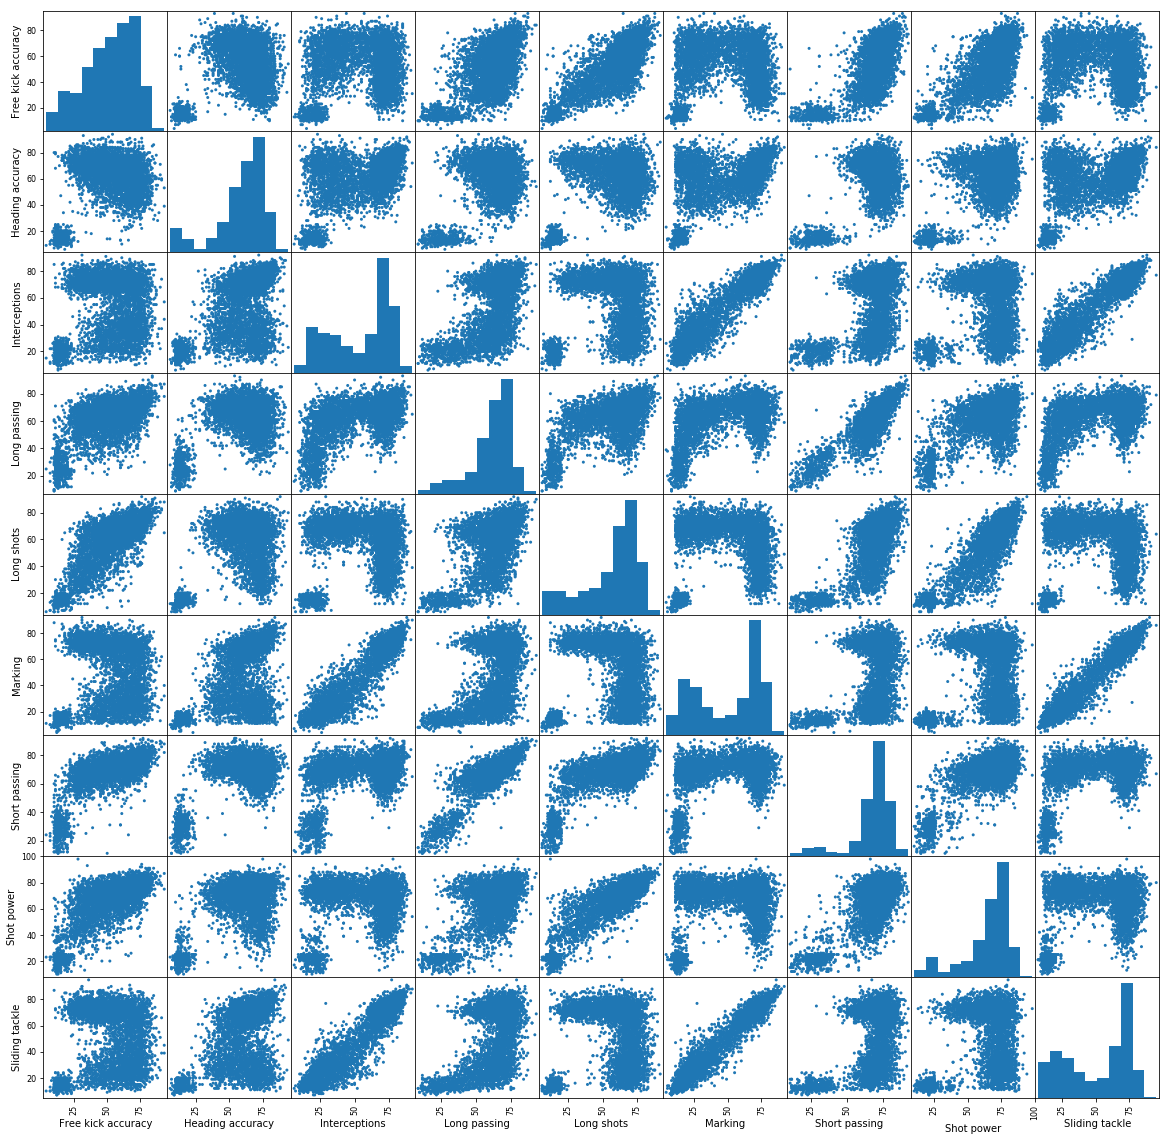

In [89]:
pd.plotting.scatter_matrix(dadoscluster[['Free kick accuracy',
'Heading accuracy',
'Interceptions',
'Long passing',
'Long shots',
'Marking',
'Short passing',
'Shot power',
'Sliding tackle',]].head(5000),alpha=1,figsize=(20,20));

# Clustering


#### Clustering com 2 grupos

In [65]:
two_means = cluster.MiniBatchKMeans(n_clusters=2)

In [66]:
two_means.fit(dadoscluster)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [68]:
saida_2 = two_means.predict(dadoscluster)

In [69]:
conjunto2 = dadoscluster.copy()


In [70]:
conjunto2['saida_2'] = saida_2

In [71]:
pd.crosstab(conjunto2['saida_2'],dados_2['Preferred Positions'])

Preferred Positions,Atk/Mid,Def
saida_2,,
0,13217,2735
1,0,2029


#### Clustering com 3 grupos 

In [49]:
three_means = cluster.MiniBatchKMeans(n_clusters=3)

In [50]:
three_means.fit(dadoscluster)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [51]:
saida_3 = three_means.predict(dadoscluster)

In [52]:
conjunto3 = dadoscluster.copy()

In [53]:
conjunto3['saida_3'] = saida_3

In [55]:
pd.crosstab(conjunto3['saida_3'],dados_3['Preferred Positions'])

Preferred Positions,Atk/Mid,Def,GK
saida_3,,,
0,6349,2637,0
1,0,0,2029
2,6868,98,0


#### Clustering com 4 grupos

In [56]:
four_means = cluster.MiniBatchKMeans(n_clusters=4)

In [119]:
four_means.fit(dadoscluster)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [120]:
saida = four_means.predict(dadoscluster)

In [121]:
conjunto = dadoscluster.copy()

In [122]:
conjunto["saida"] = saida

crosstab - preferred e saida 

In [123]:
pd.crosstab(conjunto['saida'],dados['Preferred Positions'])

Preferred Positions,Atk,Def,GK,Mid
saida,,,,
0,2917,58,0,2909
1,0,0,2029,0
2,188,1274,0,3716
3,28,1403,0,3459


#### Analisando a distribuição dos grupos a partir de atributos chave 

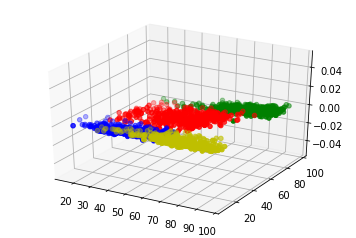

In [77]:
d0 = dados[saida == 0][['Acceleration', 'Dribbling']]
d1 = dados[saida == 1][['Acceleration', 'Dribbling']]
d2 = dados[saida == 2][['Acceleration', 'Dribbling']]
d3 = dados[saida == 3][['Acceleration', 'Dribbling']]

plt3d = plt.figure().gca(projection="3d")

plt3d.scatter(d0.Acceleration[:500], d0.Dribbling[:500], color="r")
plt3d.scatter(d1.Acceleration[:500], d1.Dribbling[:500], color="g")
plt3d.scatter(d2.Acceleration[:500], d2.Dribbling[:500], color="b")
plt3d.scatter(d3.Acceleration[:500], d2.Dribbling[:500], color="y")


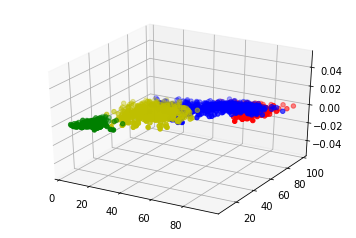

In [125]:
d4 = dados[saida == 0][['Finishing', 'Dribbling']]
d5 = dados[saida == 1][['Finishing', 'Dribbling']]
d6 = dados[saida == 2][['Finishing', 'Dribbling']]
d7 = dados[saida == 3][['Finishing', 'Dribbling']]

plt3d = plt.figure().gca(projection="3d")

plt3d.scatter(d4.Finishing[:500], d4.Dribbling[:500], color="r")
plt3d.scatter(d5.Finishing[:500], d5.Dribbling[:500], color="g")
plt3d.scatter(d6.Finishing[:500], d6.Dribbling[:500], color="b")
plt3d.scatter(d7.Finishing[:500], d7.Dribbling[:500], color="y")

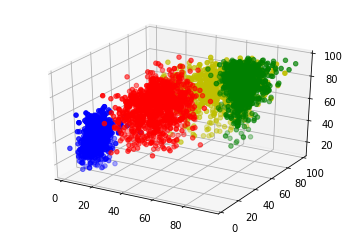

In [79]:
d4 = dados[saida == 0][['Finishing', 'Dribbling','Acceleration']]
d5 = dados[saida == 1][['Finishing', 'Dribbling','Acceleration']]
d6 = dados[saida == 2][['Finishing', 'Dribbling','Acceleration']]
d7 = dados[saida == 3][['Finishing', 'Dribbling','Acceleration']]

plt3d = plt.figure().gca(projection="3d")

plt3d.scatter(d4.Finishing[:1000], d4.Dribbling[:1000], d4.Acceleration[:1000] ,color="r")
plt3d.scatter(d5.Finishing[:1000], d5.Dribbling[:1000], d5.Acceleration[:1000] ,color="g")
plt3d.scatter(d6.Finishing[:1000], d6.Dribbling[:1000], d6.Acceleration[:1000] ,color="b")
plt3d.scatter(d7.Finishing[:1000], d7.Dribbling[:1000], d7.Acceleration[:1000] ,color="y")

In [80]:
d4 = dados[saida == 0][['Acceleration','Aggression','Agility','Balance']]
d5 = dados[saida == 1][['Acceleration','Aggression','Agility','Balance']]
d6 = dados[saida == 2][['Acceleration','Aggression','Agility','Balance']]
d7 = dados[saida == 3][['Acceleration','Aggression','Agility','Balance']]

plt3d = plt.figure().gca(projection="3d")

plt3d.scatter(d4.Aggression[:1000], d4.Agility[:1000], d4.Acceleration[:1000], d4.Balance[:1000],color="r")
plt3d.scatter(d5.Aggression[:1000], d5.Agility[:1000], d5.Acceleration[:1000], d5.Balance[:1000],color="g")
plt3d.scatter(d6.Aggression[:1000], d6.Agility[:1000], d6.Acceleration[:1000], d6.Balance[:1000],color="b")
plt3d.scatter(d7.Aggression[:1000], d7.Agility[:1000], d7.Acceleration[:1000], d7.Balance[:1000],color="y")

C:\Users\Luigi\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: invalid type comparison

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000E6F82B2EA0> (for post_execute):


AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

<Figure size 432x288 with 1 Axes>